In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import astropy 
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [3]:
filename = "cosmolike_interface/covariances_WFIRST_SO_gold.txt"
cov = np.loadtxt(filename)
df = pd.DataFrame(cov)

In [4]:
cov_log = np.log(cov)

Text(0.5, 1.05, 'covariance matrix log of value')

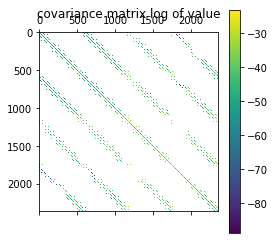

In [5]:

plt.matshow(cov_log, interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix log of value")
##plt.savefig("cosmolike_interface/cov.pdf")

Text(0.5, 1.05, 'covariance matrix shear')

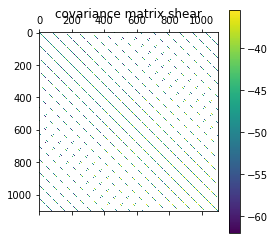

In [7]:
plt.matshow(cov_log[0:1100, 0:1100], interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix shear")

Text(0.5, 1.05, 'covariance matrix shear two bin combos')

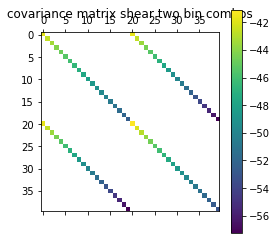

In [8]:
plt.matshow(cov_log[0:40, 0:40], interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix shear two bin combos")

In [16]:
np.mean(cov)

8.925374954781296e-17

In [33]:
new_cov = np.zeros(cov.shape)
new_cov[np.diag_indices(cov.shape[0])] = cov[np.diag_indices(cov.shape[0])] 

In [31]:
new_cov[np.diag_indices(cov.shape[0])]

array([0., 0., 0., ..., 0., 0., 0.])

Text(0.5, 1.05, 'double check it is diagonal now')

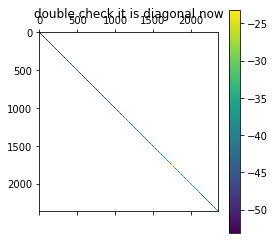

In [34]:
plt.matshow(np.log(new_cov), interpolation='nearest')
plt.colorbar()
plt.title("double check it is diagonal now")


In [37]:
np.savetxt("cosmolike_interface/covariances_WFIRST_SO_gold_diagonal.txt",new_cov)

In [40]:
np.linalg.cholesky(cov)

LinAlgError: Matrix is not positive definite

In [41]:
np.linalg.inv(cov)

array([[4.58452426e+18, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.17353742e+18, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.43617996e+19, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.59197956e+18, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.51002434e+18, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.71884582e+17]])

In [46]:
 np.all(np.linalg.eigvals(cov) > 0)

False

In [53]:
np.sum(np.linalg.eigvals(cov) < 0)

20

In [54]:
np.where(np.linalg.eigvals(cov) < 0)

(array([ 382,  430,  485,  565,  640,  729,  767,  820,  823,  874,  919,
        931,  951, 1002, 1081, 1117, 1146, 1227, 1293, 1438], dtype=int64),)

In [32]:
np.linalg.eigvals(cov)[np.where(np.linalg.eigvals(cov) < 0 )]

array([-9.16581521e-17, -4.29741398e-17, -1.73529684e-17, -6.19785866e-18,
       -2.03897426e-18, -6.63825061e-19, -3.89122899e-19, -2.17675772e-19,
       -1.99672839e-19, -9.82270248e-20, -5.24349237e-20, -4.56858822e-20,
       -3.78453666e-20, -2.45796041e-20, -1.23786287e-20, -9.70245154e-21,
       -8.06964546e-21, -3.57391962e-21, -2.04295646e-21, -4.00556995e-22])

(-1e-17, 1e-17)

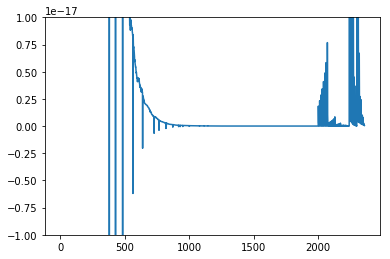

In [44]:
plt.plot(range(cov.shape[0]),np.linalg.eigvals(cov))
plt.ylim(-10e-18, 10e-18)
#plt.yscale("log")

In [12]:
a = np.where(cov < 0)


array([-2.166809e-22, -2.262703e-22, -2.335270e-22, ..., -2.870755e-23,
       -5.147766e-24, -4.141971e-25])

In [58]:

print(np.array_str(cov[380:385,380:385], precision=2))

[[1.46e-17 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.15e-18 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 2.53e-18 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.02e-18 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 0.00e+00 4.02e-19]]


Text(0.5, 1.05, 'covariance matrix negative values')

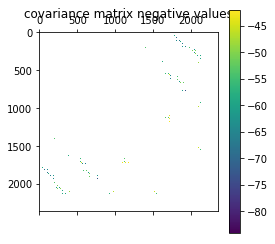

In [20]:
plt.matshow(np.log(np.where(cov<0, -cov, 0)), interpolation='nearest')
plt.colorbar()
plt.title("covariance matrix negative values")

negative values cluster in lower and right part

shear and shear cmb kappa lead to these


In [19]:
np.linalg.cholesky(cov[0:1500,0:1500])

array([[8.37443729e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.62369096e-10, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.82553787e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.94514883e-11, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.32703670e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.59813424e-11]])

In [22]:
np.linalg.det(cov)

0.0

In [30]:
np.allclose(cov, cov.T, 1e-58)

True

In [31]:
np.linalg.slogdet(cov)

(1.0, -102466.31876669571)